In [1]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import models

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import seaborn as sns

import pandas as pd

2024-04-11 21:54:21.742089: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-11 21:54:21.744645: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 21:54:21.778993: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 21:54:21.779627: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-11 21:54:22.323390: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
import tensorflow.keras.datasets.mnist as mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

**Question : faire de même avec l'ensemble des images de tests**

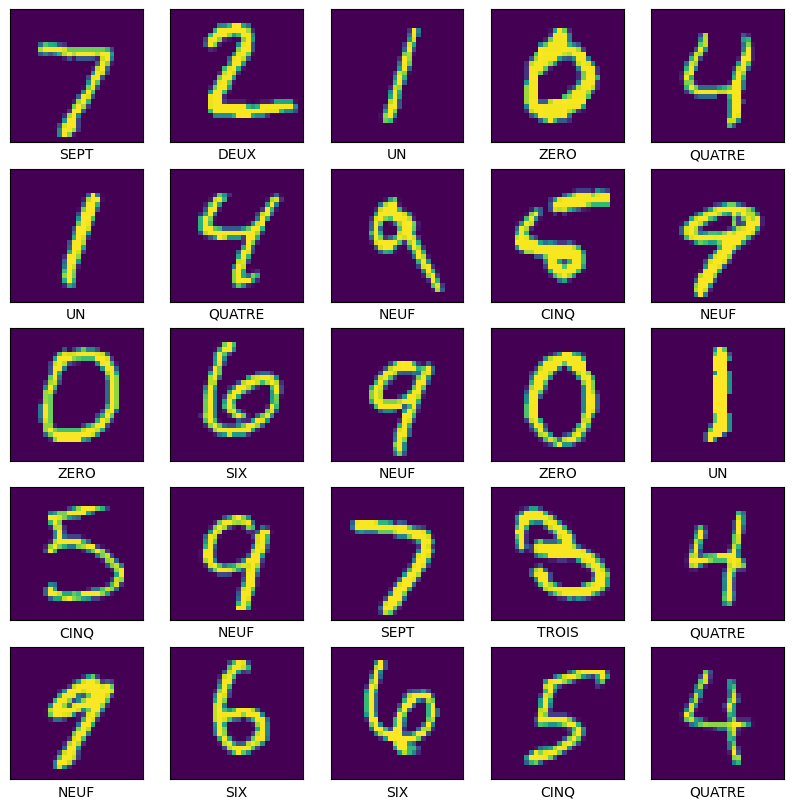

In [3]:
# MNIST
class_names = ['ZERO', 'UN', 'DEUX', 'TROIS', 'QUATRE', 'CINQ',
               'SIX', 'SEPT', 'HUIT', 'NEUF']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [34]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


def cnn(in_shape=(28, 28, 1),out_shape=10):
    
    # Couche "feature map"
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=in_shape))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Couche classification
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(out_shape,activation="sigmoid"))
    
    return model

model = cnn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                346176    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

**Question : quelle est la taille de la sortie de la couche __Flatten__?**

Size after faltten is 5408

**Question : quel est le nombre de paramètres du modèle complet ?**

The model has 347146 parameters

**Question : sur la base de ce que vous avez fait à la fin du TP précédent, écrire les lignes de code pour définir les paramètres de l'apprentissage et pour lancer le fitting du modèle sur 10 epochs.**

In [35]:
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
history = model.fit(x_train, y_train_cat,validation_split=0.2,epochs=10, batch_size=10,verbose=1)
# _, accuracy = model.evaluate(X, y,verbose=1)


Epoch 1/10
4800/4800 [==============================] - 22s 5ms/step - loss: 0.7738 - accuracy: 0.5053 - val_loss: 0.9779 - val_accuracy: 0.3866
Epoch 2/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.5752 - accuracy: 0.6351 - val_loss: 0.5220 - val_accuracy: 0.6731
Epoch 3/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.4884 - accuracy: 0.6906 - val_loss: 0.4801 - val_accuracy: 0.7142
Epoch 4/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.4856 - accuracy: 0.6954 - val_loss: 0.4789 - val_accuracy: 0.6929
Epoch 5/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.4786 - accuracy: 0.6935 - val_loss: 0.4847 - val_accuracy: 0.6979
Epoch 6/10
4800/4800 [==============================] - 21s 4ms/step - loss: 0.4685 - accuracy: 0.7030 - val_loss: 0.4757 - val_accuracy: 0.6965
Epoch 7/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.4695 - accuracy: 0.7075 - val_loss: 0.4737 - val_ac

**Question : évaluer le modèle obtenu sur la base de test complète et calculer l'accuracy.**

In [32]:
_, train_accuracy = model.evaluate(x_train, y_train_cat,verbose=1)
_, test_accuracy = model.evaluate(x_test, y_test_cat,verbose=1)
print("train_accuracy : {:.2f}".format(train_accuracy))
print("test_accuracy : {:.2f}".format(test_accuracy))

313/313 [==============================] - 0s 1ms/step - loss: 0.5049 - accuracy: 0.7206
train_accuracy : 0.73
test_accuracy : 0.72


**Question : retrouver les images de la base de test sur lesquelles le modèle fait de mauvaises prédictions.**

In [27]:
y_pred_cat = model.predict(x_test)
y_pred = np.argmax(y_pred_cat,axis=1)
y_pred_eror = y_pred != np.argmax(y_test_cat,axis=1)

  1/313 [..............................] - ETA: 3s

313/313 [==============================] - 0s 1ms/step


In [29]:
print(y_pred[:10])
print(np.argmax(y_test_cat[y_pred_eror],axis=1)[:10])
print(x_test[y_pred_eror][0].shape)


[7 2 8 0 4 8 8 9 5 9]
[1 1 4 1 3 4 4 1 3 1]
(28, 28)


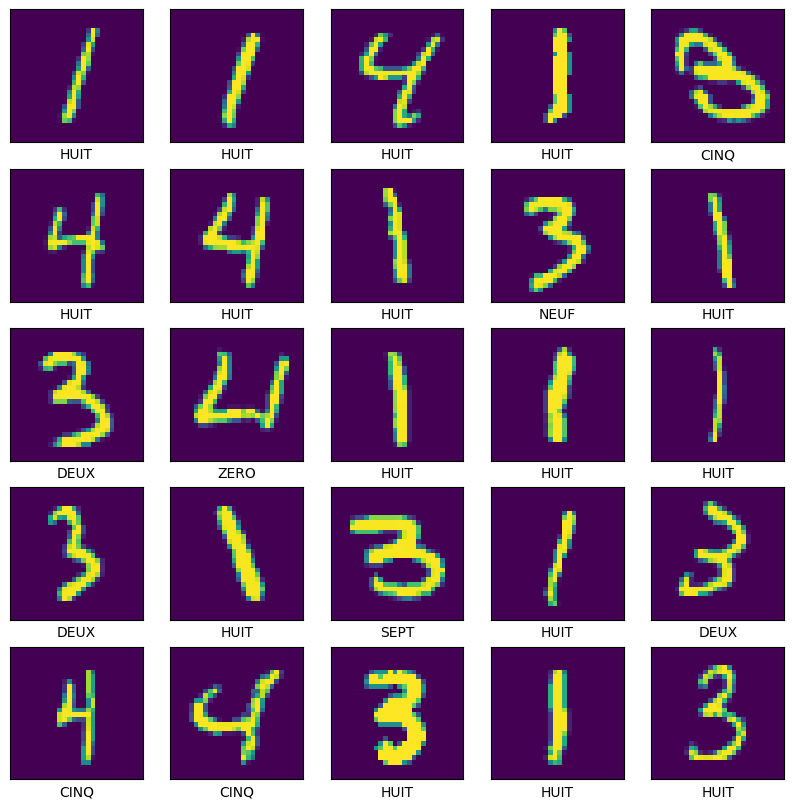

In [30]:
class_names = ['ZERO', 'UN', 'DEUX', 'TROIS', 'QUATRE', 'CINQ',
               'SIX', 'SEPT', 'HUIT', 'NEUF']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[y_pred_eror][i])
    plt.xlabel(class_names[y_pred[y_pred_eror][i]])
plt.show()

**Question : définir un CNN dont la composition est la suivante et donner son nombre de paramètres :**

In [46]:
def cnn(in_shape=(28, 28, 1),out_shape=10):
    
    # Couche "feature map"
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=in_shape))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Couche classification
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(out_shape,activation="sigmoid")))
    
    return model

model = cnn()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 8)           1160      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 1, 1, 8)          

**Question : lancer son entraînement sur la base d'entrainement sur 10 épochs, des batchs de 32 images et un split de 20% pour la base d'évaluation.**

In [48]:
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
history = model.fit(x_train, y_train_cat,validation_split=0.2,epochs=10, batch_size=32,verbose=1)



Epoch 1/10
4800/4800 [==============================] - 21s 4ms/step - loss: 0.5192 - accuracy: 0.5365 - val_loss: 0.4323 - val_accuracy: 0.6769
Epoch 2/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.4196 - accuracy: 0.6889 - val_loss: 0.4106 - val_accuracy: 0.7092
Epoch 3/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.4193 - accuracy: 0.6874 - val_loss: 0.4089 - val_accuracy: 0.7096
Epoch 4/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.3938 - accuracy: 0.7229 - val_loss: 0.3917 - val_accuracy: 0.7326
Epoch 5/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.3909 - accuracy: 0.7278 - val_loss: 0.3846 - val_accuracy: 0.7387
Epoch 6/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.3866 - accuracy: 0.7309 - val_loss: 0.3893 - val_accuracy: 0.7228
Epoch 7/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.3986 - accuracy: 0.7243 - val_loss: 0.3834 - val_ac

**Question : evaluer ce modèle sur la base de test et calculer la valeur d'accuracy.**

In [49]:
_, train_accuracy = model.evaluate(x_train, y_train_cat,verbose=1)
_, test_accuracy = model.evaluate(x_test, y_test_cat,verbose=1)
print("train_accuracy : {:.2f}".format(train_accuracy))
print("test_accuracy : {:.2f}".format(test_accuracy))

313/313 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.7534
train_accuracy : 0.75
test_accuracy : 0.75


# Color Image Classification

**Question : définir, entraîner, tracer les courbes et évaluer l'architecture convolutive suivante. Utiliser l'algorithme Adam, fixer le nombre d'epochs à 100 et la taille des batchs à 32 images. Garder à l'esprit que les images sont RGB donc certaines parties du code précédent devront être modifiées en conséquence. Vous mènerez l'évaluation sur la base de test. Voici l'architecture :**

In [55]:
import tensorflow.keras.datasets.cifar10 as cifar10

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 6s 0us/step


In [56]:
import tensorflow.keras.datasets.cifar10 as cifar10

# Normalisation des valeurs RGBdes pixels
x_train, x_test = x_train / 255.0, x_test / 255.0

In [86]:
def cnn(in_shape=(32, 32, 3),out_shape=10):
    
    # Couche "feature map"
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding="same", input_shape=in_shape ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same" ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"  ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu' , padding="same"))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    

    # Couche classification
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(out_shape,activation="sigmoid"))
    
    return model

model = cnn()
model.summary()

Model: "sequential_34"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 conv2d_111 (Conv2D)         (None, 32, 32, 256)       7168      
                                                                 
 max_pooling2d_99 (MaxPooli  (None, 16, 16, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_112 (Conv2D)         (None, 16, 16, 128)       295040    
                                                                 
 max_pooling2d_100 (MaxPool  (None, 8, 8, 128)         0         
 ing2D)                                                          
                                                                 
 conv2d_113 (Conv2D)         (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_101 (MaxPool  (None, 4, 4, 64)          0         
 ing2D)                                                          
          

**Question : quelles constatations pouvions nous en tirer si les couches CNN utilise un padding='valid' ?**


In [81]:
def cnn(in_shape=(32, 32, 3),out_shape=10):
    
    # Couche "feature map"
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding="valid", input_shape=in_shape ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="valid" ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="valid"  ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu' , padding="valid"))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    

    # Couche classification
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(out_shape,activation="sigmoid"))
    
    return model

model = cnn()
model.summary()

ValueError: Exception encountered when calling layer "conv2d_94" (type Conv2D).

Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_94/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_94/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [3,3,64,32].

Call arguments received by layer "conv2d_94" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 2, 2, 64), dtype=float32)

**Question : en analysant les courbes d'apprentissage que constatez-vous (dans le cas padding='same') ?**

In [85]:
model = cnn()
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
history = model.fit(x_train, y_train_cat,validation_split=0.2,epochs=10, batch_size=32,verbose=1)


Epoch 1/10
 342/1250 [=======>......................] - ETA: 1:32 - loss: 0.3510 - accuracy: 0.1014

KeyboardInterrupt: 

In [ ]:
_, train_accuracy = model.evaluate(x_train, y_train_cat,verbose=1)
_, test_accuracy = model.evaluate(x_test, y_test_cat,verbose=1)
print("train_accuracy : {:.2f}".format(train_accuracy))
print("test_accuracy : {:.2f}".format(test_accuracy))